In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


1. Analisis de facturación

In [3]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
nombre_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos_totales = [sum(tienda1['Precio']) for tienda1 in lista_tiendas]
for i in range(len(ingresos_totales)):
  print(f'{nombre_tiendas[i]} tuvo ingresos de ${ingresos_totales[i]:,}')

Tienda 1 tuvo ingresos de $1,150,880,400.0
Tienda 2 tuvo ingresos de $1,116,343,500.0
Tienda 3 tuvo ingresos de $1,098,019,600.0
Tienda 4 tuvo ingresos de $1,038,375,700.0


2. Ventas por categoría

In [ ]:
def obtener_categorias(tienda1) -> dict:
  ventas_categoria = {}
  for categoria in tienda1['Categoría del Producto']:
    if categoria in ventas_categoria:
      ventas_categoria[categoria] += 1
    else:
      ventas_categoria.update({categoria: 1})
    ventas_categoria = dict(sorted(ventas_categoria.items(), key=lambda item: item[1], reverse=True))
  return ventas_categoria
for i in range(len(lista_tiendas)):
  print(f'{nombre_tiendas[i]} ventas por categoría ordenadas de más vendido a menos: {obtener_categorias(lista_tiendas[i])}')


Tienda 1 ventas por categoría ordenadas de más vendido a menos: {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
Tienda 2 ventas por categoría ordenadas de más vendido a menos: {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
Tienda 3 ventas por categoría ordenadas de más vendido a menos: {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
Tienda 4 ventas por categoría ordenadas de más vendido a menos: {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales

3. Calificación promedio de la tienda

In [4]:
def promedio_calificacion(tienda1):
  for calificacion in tienda1['Calificación']:
    return round(sum(tienda1['Calificación']) / len(tienda1['Calificación']), 3)
for i in range(len(lista_tiendas)):
  print(f'Calificación de la {nombre_tiendas[i]}: {promedio_calificacion(lista_tiendas[i])}')
calif = promedio_calificacion(tienda)
calif2 = promedio_calificacion(tienda2)
calif3 = promedio_calificacion(tienda3)
calif4 = promedio_calificacion(tienda4)
califs = [calif, calif2, calif3, calif4]

Calificación de la Tienda 1: 3.977
Calificación de la Tienda 2: 4.037
Calificación de la Tienda 3: 4.048
Calificación de la Tienda 4: 3.996


4. Productos más y menos vendidos

In [ ]:
def obtener_productos(tienda1) -> dict:
  ventas_producto = {}
  for producto in tienda1['Producto']:
    if producto in ventas_producto:
      ventas_producto[producto] += 1
    else:
      ventas_producto.update({producto: 1})
  return ventas_producto
listas_productos = [obtener_productos(tienda1) for tienda1 in lista_tiendas]
lista_ord_asc = [dict(sorted(listas_productos[i].items(), key=lambda item: item[1])) for i in range(len(listas_productos))]
lista_ord_des = [dict(sorted(listas_productos[i].items(), key=lambda item: item[1], reverse=True)) for i in range(len(listas_productos))]
mas_vendidos = [list(lista_ord_des[i].keys())[:5] for i in range(len(listas_productos))]
menos_vendidos = [list(lista_ord_asc[i].keys())[:5] for i in range(len(listas_productos))]
mas_vendidosv = [list(lista_ord_des[i].values())[:5] for i in range(len(listas_productos))]
menos_vendidosv = [list(lista_ord_asc[i].values())[:5] for i in range(len(listas_productos))]
for i in range(len(lista_tiendas)):
  print(f'{nombre_tiendas[i]} ventas por productos ordenadas de más vendidos a menos: {lista_ord_des[i]}')
print('\nTop 5 más vendidos\n')
for i in range(len(lista_tiendas)):
  print(f'{nombre_tiendas[i]} top 5 más vendidos: {mas_vendidos[i]}')
print('\nTop 5 menos vendidos\n')
for i in range(len(lista_tiendas)):
  print(f'{nombre_tiendas[i]} top 5 menos vendidos: {menos_vendidos[i]}')

Tienda 1 ventas por productos ordenadas de más vendidos a menos: {'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60, 'Secadora de ropa': 58, 'Bloques de construcción': 56, 'Mesa de noche': 56, 'Balón de baloncesto': 55, 'Refrigerador': 54, 'Bicicleta': 54, 'Vaso térmico': 54, 'Impresora': 54, 'Batería': 53, 'Carrito de control remoto': 52, 'Cubertería': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Silla de oficina': 46, 'Sofá reclinable': 46, 'Guitarra acústica': 46, 'Estufa': 45, 'Kit de bancas': 44, 'Cama box': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Cama king': 44, 'Smart TV': 44, 'Juego de mesa': 43, 'Set de ollas': 43, 'Smartwatch': 43, 'Balón de voleibol': 42, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Set de vasos': 41, 'Sillón': 41, 'Iniciando en programación': 41, 'Asistente virtual': 40, 'Mesa de comedor': 40, 'Muñeca bebé': 40, 'Cuerda pa

5. Envío promedio por tienda

In [5]:
def promedio_envio(tienda1):
  for envio in tienda1['Costo de envío']:
    return round(sum(tienda1['Costo de envío']) / len(tienda1['Costo de envío']), 2)
envio = []
for i in range(len(lista_tiendas)):
  print(f'Costo de envío de la {nombre_tiendas[i]}: ${promedio_envio(lista_tiendas[i]):,}')
  envio.append(promedio_envio(lista_tiendas[i]))

costoe_total = [sum(tienda1['Costo de envío']) for tienda1 in lista_tiendas]
for i in range(len(costoe_total)):
  print(f'{nombre_tiendas[i]} costos totales por envíos de ${costoe_total[i]:,}')

Costo de envío de la Tienda 1: $26,018.61
Costo de envío de la Tienda 2: $25,216.24
Costo de envío de la Tienda 3: $24,805.68
Costo de envío de la Tienda 4: $23,459.46
Tienda 1 costos totales por envíos de $61,377,900.0
Tienda 2 costos totales por envíos de $59,485,100.0
Tienda 3 costos totales por envíos de $58,516,600.0
Tienda 4 costos totales por envíos de $55,317,400.0


# INFORME FINAL
En este challenge se realizó el análisis de las cuatro tiendas del señor Juan, este análisis se hizó con el fin de que el pueda vender una de las tiendas para invertir en otro negocio. Para evaluar el desempeño de las tiendas se compararon 5 parametros:


*   Ingresos totales por tienda
*   Ventas por categoria
*   Calificación promedio de la tienda
*   Productos más y menos vendidos
*   Envío promedio por tienda

**Ingresos totales por tienda**








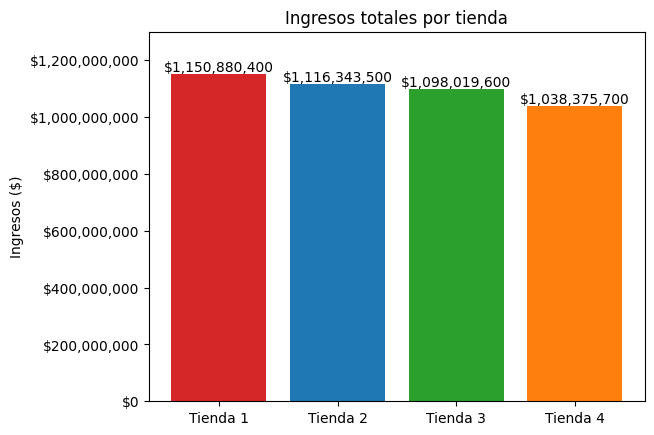

In [ ]:

fig, ax = plt.subplots()

tiendas = nombre_tiendas
ingresos = ingresos_totales
bar_labels = nombre_tiendas
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
bars = ax.bar(tiendas, ingresos, label=bar_labels, color=bar_colors)
ingresos_ticks = list(range(0, 1300000001, 200000000))
plt.yticks(ingresos_ticks, [f"${x:,}" for x in ingresos_ticks])
ax.set_ylabel('Ingresos ($)')
ax.set_title('Ingresos totales por tienda')
ax.set_ylim(0, 1300000000)
for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )
plt.show()

Podemos observar en la gráfica que la tienda 4 es la que tiene menos ingresos respecto a las demás, a comparación de la tienda 1 tiene 100 millones menos, y de la 3 que es la segunda con menos ingresos existe una diferencia de aproximadamente 60 millones.


**Ventas por categoría**

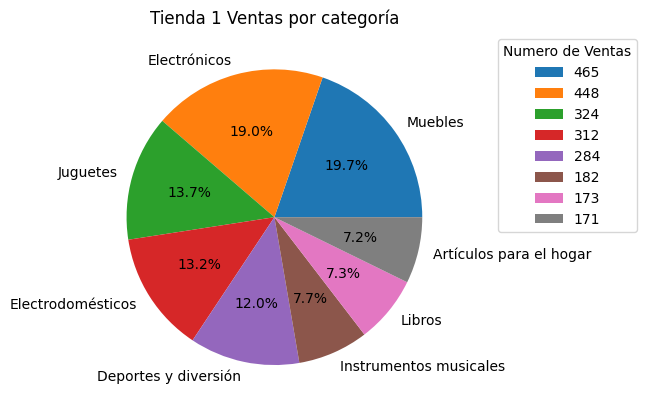

In [ ]:
labels1 = list(obtener_categorias(tienda).keys())
sizes = list(obtener_categorias(tienda).values())
fig, ax = plt.subplots()
ax.set_title("Tienda 1 Ventas por categoría")
ax.pie(sizes, labels=labels1, autopct='%.1f%%')
ax.legend(labels = sizes, title = "Numero de Ventas", bbox_to_anchor=(1, 0, 0.5, 1))


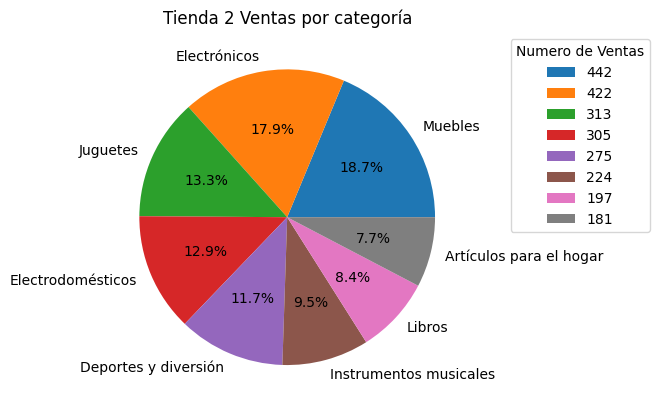

In [ ]:
labels2 = list(obtener_categorias(tienda2).keys())
sizes2 = list(obtener_categorias(tienda2).values())
fig, ax = plt.subplots()
ax.set_title("Tienda 2 Ventas por categoría")
ax.pie(sizes2, labels=labels2, autopct='%.1f%%')
ax.legend(labels = sizes2, title = "Numero de Ventas", bbox_to_anchor=(1, 0, 0.5, 1))



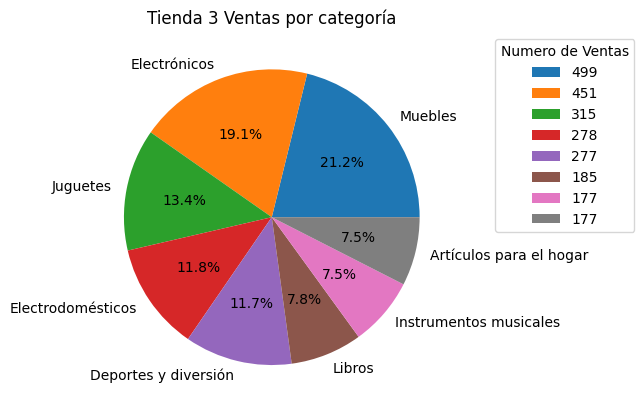

In [ ]:
labels3 = list(obtener_categorias(tienda3).keys())
sizes3 = list(obtener_categorias(tienda3).values())
fig, ax = plt.subplots()
ax.set_title("Tienda 3 Ventas por categoría")
ax.pie(sizes3, labels=labels3, autopct='%.1f%%')
ax.legend(labels = sizes3, title = "Numero de Ventas", bbox_to_anchor=(1, 0, 0.5, 1))



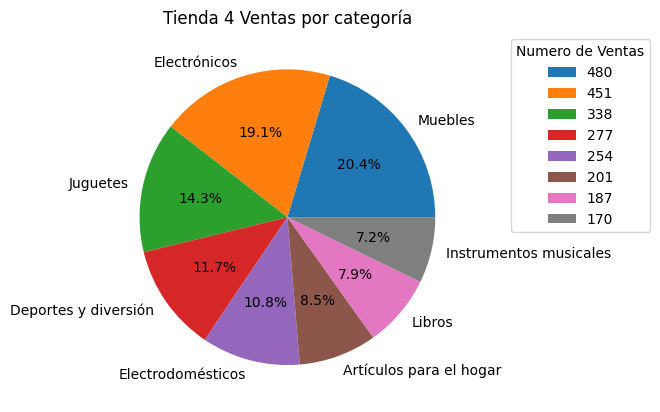

In [ ]:
labels4 = list(obtener_categorias(tienda4).keys())
sizes4 = list(obtener_categorias(tienda4).values())
fig, ax = plt.subplots()
ax.set_title("Tienda 4 Ventas por categoría")
ax.pie(sizes4, labels=labels4, autopct='%.1f%%')
ax.legend(labels = sizes4, title = "Numero de Ventas", bbox_to_anchor=(1, 0, 0.5, 1))

Como podemos observar en las graficas tenemos tendencias de ventas similares en todas las tiendas pues las tres categorías más populares en las 4 tiendas son: electrónicos, muebles y juguetes; en cambio las 3 categorías con menos ventas fueron: libros, instrumentos musicales y articulos para el hogar.

 **Calificación promedio de las tiendas**

Para analizar este parámetro vamos a visualizar un gráfico de barras horizontal que nos permitirá comparar de mejor manera a las 4 tiendas.

<ipython-input-42-b192aa05c62e>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


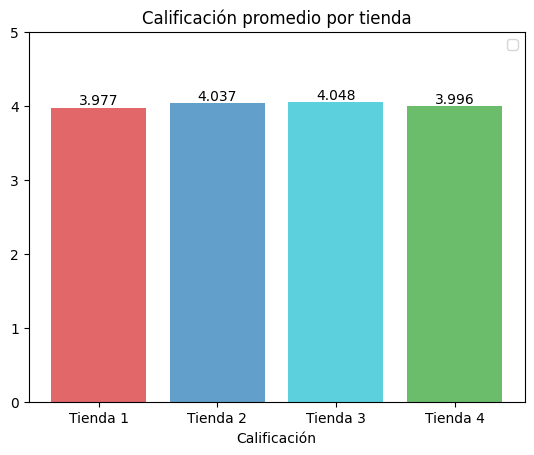

In [ ]:
tiendas = nombre_tiendas
calificaciones = califs
bar_labels = nombre_tiendas
bar_colors = ['tab:red', 'tab:blue', 'tab:cyan', 'tab:green']
bars = ax.bar(tiendas, calificaciones, label=bar_labels, color=bar_colors)
plt.bar(nombre_tiendas, calificaciones, align='center', alpha=0.7, color=bar_colors)
ctick = list(range(6))
plt.yticks(ctick, [f"{x}" for x in ctick])
plt.xlabel('Calificación')
plt.title('Calificación promedio por tienda')
for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:,}',
            ha='center', va='bottom', fontsize=10
        )

plt.legend()
plt.show()


Lo que podemos ver es que las tiendas 2 y 3 presentan las mejores calificaciones por un pequeño margen entre sí, mientras que las tiendas 1 y 4 tienen ligeramente menor calificación.

La peor calificada es la tienda 1 y la que le sigue es la 4 por una diferencia de 20 centésimas aproximadamente mejor calificada.

**Productos más y menos vendidos de cada tienda**

A continuación se muestran los productos 5 productos más vendidos de cada una de las 4 tiendas:

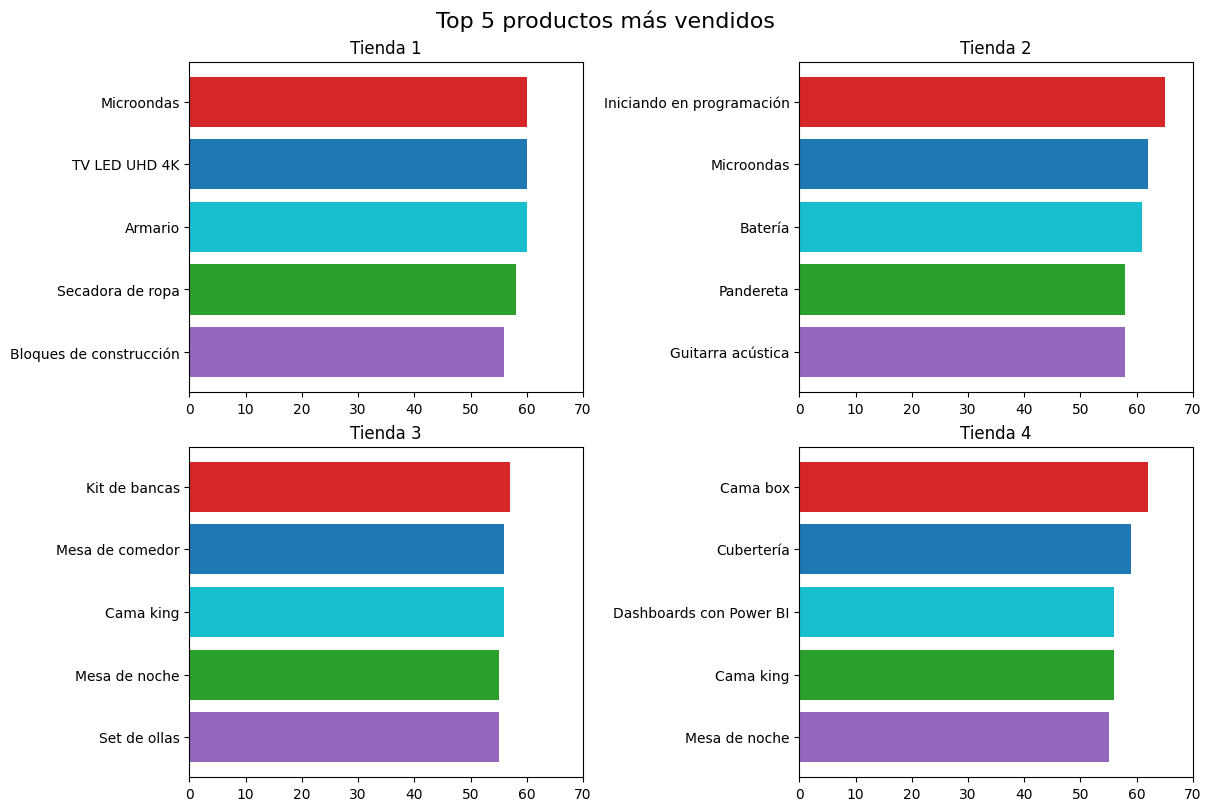

In [ ]:
fig, axs = plt.subplots(2, 2, layout='constrained', figsize = [12,8])
axs_subs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
bar_colors = ['tab:red', 'tab:blue', 'tab:cyan', 'tab:green', 'tab:purple']
y_pos = list(range(len(bar_colors)))
for i in range(0, len(mas_vendidos)):
  productos = mas_vendidos[i]
  cantidad = mas_vendidosv[i]
  axs_subs[i].barh(y_pos, cantidad, align='center', color=bar_colors)
  axs_subs[i].set_title(nombre_tiendas[i])
  axs_subs[i].set_yticks(y_pos, labels=productos)
  axs_subs[i].set_xticks(list(range(0, 71, 10)))
  axs_subs[i].invert_yaxis()
fig.suptitle('Top 5 productos más vendidos', fontsize=16)
plt.show()

Cada tienda tiene sus propios productos que destacan, pero en la tienda 1 y 3 se tienen cantidades similares en ventas de los productos más populares.

Ahora procedemos a ver cuales son los 5 productos menos vendidos de cada tienda.

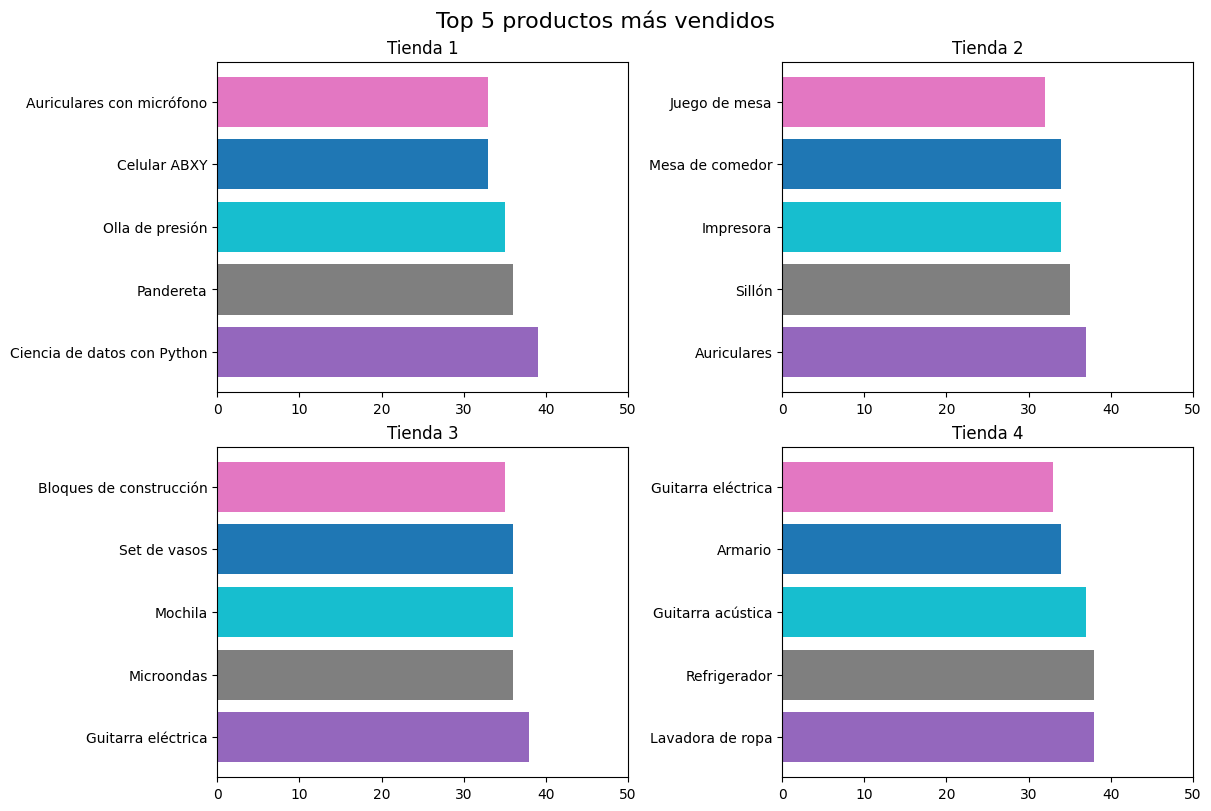

In [ ]:
fig, axs = plt.subplots(2, 2, layout='constrained', figsize = [12,8])
axs_subs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
bar_colors = ['tab:pink', 'tab:blue', 'tab:cyan', 'tab:gray', 'tab:purple']
y_pos = list(range(len(bar_colors)))
for i in range(0, len(menos_vendidos)):
  productos = menos_vendidos[i]
  cantidad = menos_vendidosv[i]
  axs_subs[i].barh(y_pos, cantidad, align='center', color=bar_colors)
  axs_subs[i].set_title(nombre_tiendas[i])
  axs_subs[i].set_yticks(y_pos, labels=productos)
  axs_subs[i].set_xticks(list(range(0, 51, 10)))
  axs_subs[i].invert_yaxis()
fig.suptitle('Top 5 productos menos vendidos', fontsize=16)
plt.show()

Al igual que los más vendidos hay variedad entre las diferentes tiendas y sus productos menos vendidos.

**Costo promedio por envío**

Ahora con una gráfica de barras vamos a visualizar el costo promedio por envío de cada una de las tiendas.




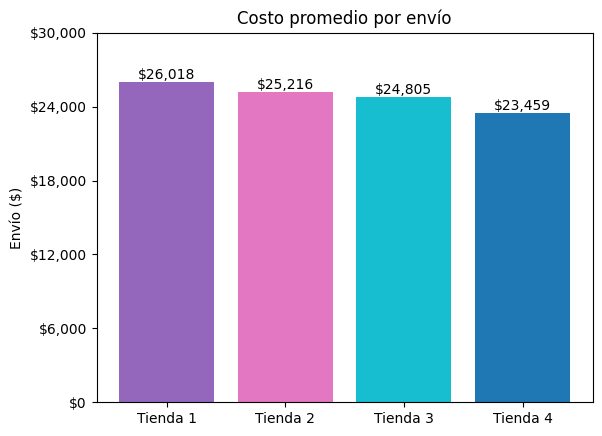

In [ ]:
fig, ax = plt.subplots()

tiendas = nombre_tiendas
bar_labels = nombre_tiendas
bar_colors = ['tab:purple', 'tab:pink', 'tab:cyan', 'tab:blue']
bars = ax.bar(tiendas, envio, label=bar_labels, color=bar_colors)
envio_ticks = list(range(0, 30001, 6000))
plt.yticks(envio_ticks, [f"${x:,}" for x in envio_ticks])
ax.set_ylabel('Envío ($)')
ax.set_title('Costo promedio por envío')
for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )
plt.show()

Podemos ver que la tienda 4 tiene los menores gastos por envíos mientras que la 1 le saca unos 3000 más.


In [8]:
in_menos_env  = list(map(lambda x,y: x-y ,ingresos_totales,costoe_total))
print(in_menos_env)

[1089502500.0, 1056858400.0, 1039503000.0, 983058300.0]


**Conclusión**

Después de hacer todos estos análisis de las tiendas es posible ver que la tienda 2 y 3 son las más estables de las que tiene el Sr. Juan ya que cuentan con calificación promedio de más de 4 y costos por intermedios; en cambio las tiendas 1 y 4 tienen calificaciones menores a 4.

El punto importante aquí son los ingresos de las tiendas, la tienda 1 es la que le da mayores ingresos al Sr. Juan por lo que no sería buena idea venderla, en cambio la 4 es la que menos ingresos tiene y su calificación respecto a la 1 es casi la misma, el costo de envío si es más alto en la 1 pero se compensa con los ingresos totales que presenta, si vemos la lista anterior los ingresos menos los costos por envío son mayores en la tienda 1 aún así con que el enío promedio es más caro; es por esto que es más recomendable para el Sr. Juan vender la tienda numero 4.